<a href="https://colab.research.google.com/github/Krylze/Data-Science/blob/main/Resolver_problema_utilizando_Regresi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Regresion Lineal


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
housing = datasets.fetch_california_housing()
print(housing)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [ ]:
print("Informacion del Dataset")
print(housing.keys())
print(housing.DESCR)

Informacion del Dataset
dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of t

In [ ]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [ ]:
housingDf = pd.DataFrame(housing.data, columns=housing.feature_names)
housingDf['MedHouseVal'] = housing.target
print(housingDf.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [ ]:
x = housingDf[['MedInc']]
y = housingDf['MedHouseVal']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
lr = linear_model.LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [ ]:
y_pred = lr.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Error Cuadrático Medio: {mse}")

Error Cuadrático Medio: 0.7199498036420122


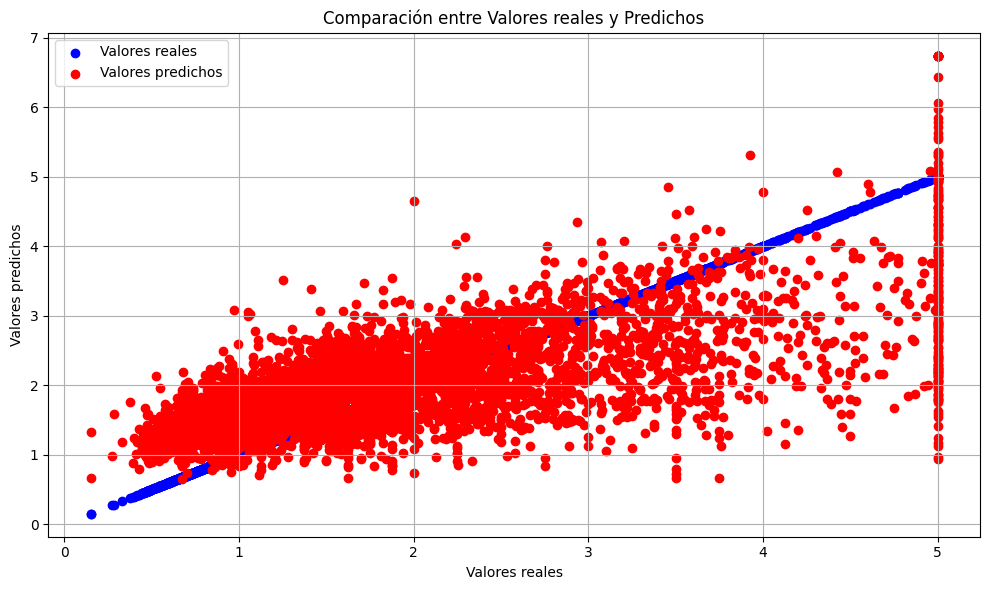

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test, color='blue', label='Valores reales')
plt.scatter(y_test, y_pred, color='red', label='Valores predichos')
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.title("Comparación entre Valores reales y Predichos")
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

## Regresion Lineal Multiple

In [ ]:
xMultiple = housingDf[['MedInc', 'AveRooms', 'AveOccup', 'Latitude', 'Longitude']]
yMultiple = housingDf['MedHouseVal']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(xMultiple, yMultiple, test_size=0.2, random_state=42)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Coeficiente de Determinación (R²): {r2}")

Error Cuadrático Medio (MSE): 0.5591975700714794
Coeficiente de Determinación (R²): 0.573264851388496


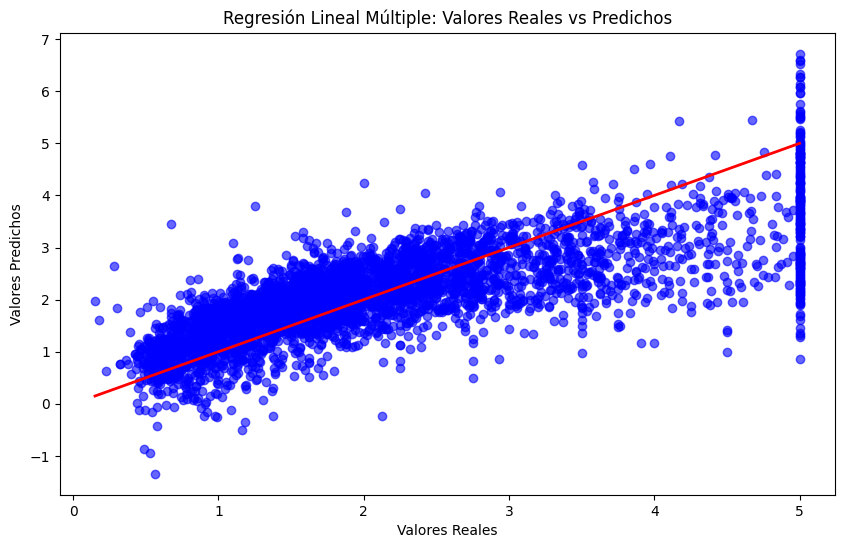

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Línea de referencia
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Regresión Lineal Múltiple: Valores Reales vs Predichos')
plt.show()

## Regresion Polinomial

In [ ]:
X = housingDf[['MedInc']]
y = housingDf['MedHouseVal']

In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=False)
XPoly = poly.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(XPoly, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Coeficiente de Determinación (R²): {r2}")

Error Cuadrático Medio (MSE): 0.7032732680932144
Coeficiente de Determinación (R²): 0.46331772769346224


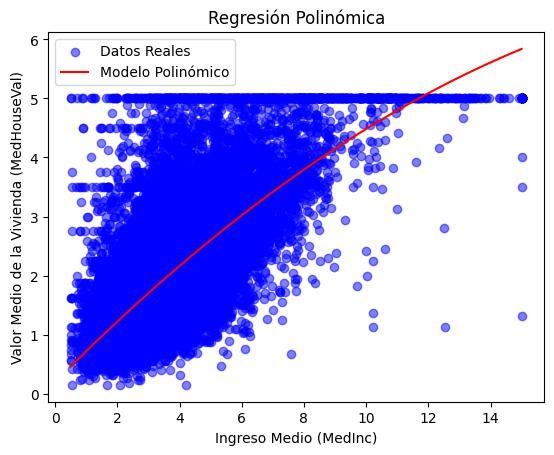

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X, y, color='blue', alpha=0.5, label='Datos Reales')
sorted_idx = np.argsort(X.values.flatten())
plt.plot(X.values.flatten()[sorted_idx], model.predict(poly.transform(X))[sorted_idx], color='red', label='Modelo Polinómico')
plt.xlabel('Ingreso Medio (MedInc)')
plt.ylabel('Valor Medio de la Vivienda (MedHouseVal)')
plt.title('Regresión Polinómica')
plt.legend()
plt.show()